In [ ]:
!pip install wordcloud nltk matplotlib seaborn pandas --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
import os

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('polish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
os.makedirs("output", exist_ok=True)

In [ ]:
df = pd.read_csv("BAN-PL.csv")

In [64]:
df[["Text", "Class"]].head(5)

,Text,Class
0,\n\n\n Polska wtedy oficjalnie powi...,0
1,\n Gigantyczna różnica\n\n{USERNAME}: biorac ...,0
2,\n\n {USERNAME}: Moj kumpel budowla...,0
3,"kura, rzodkiewka za 3pln to nie jest tanio",0
4,{USERNAME}: większość nie idzie w marszu za PO...,0


In [67]:
df[["Text", "Class"]].tail(20)

,Text,Class
23980,{USERNAME}: Ale bym ci zasadzil kopa,1
23981,> A później w komentarzach narzekasz jeszcze ż...,1
23982,{USERNAME}: zglaszam smiecia. Niech w takim ra...,1
23983,"{USERNAME}: To co, usuniesz swoje kłamstwa? Cz...",1
23984,{USERNAME}: jesteś debilem. Myślisz że sędzia ...,1
23985,ten czrewony śmieć jeszcze żyje?,1
23986,I właśnie dla takich odpadów społecznych przył...,1
23987,Rozjebie mnie zaraz jakie przesylanie z netfli...,1
23988,Papryk [surname] prezentuje: ''Europa Universa...,1
23989,{USERNAME}: Żadnego koła nie zatoczy. Serio my...,1


In [ ]:
total = len(df)
class_counts = df['Class'].value_counts().sort_index()

In [ ]:
df['char_len'] = df['Text'].apply(lambda x: len(str(x)))
df['word_len'] = df['Text'].apply(lambda x: len(str(x).split()))

length_stats = df.groupby('Class')[['char_len', 'word_len']].mean().round(2)
print("📏 Średnia długość tekstów (znaki i słowa) według klasy:\n")
print(length_stats)

📏 Średnia długość tekstów (znaki i słowa) według klasy:

       char_len  word_len
Class                    
0        223.35     33.78
1        170.22     26.68


In [ ]:
with open("output/length_stats.txt", "w", encoding="utf-8") as f:
    f.write("📏 Średnia długość tekstów wg klasy (GENERAL TAG):\n")
    for cls, row in length_stats.iterrows():
        nazwa = "nieszkodliwe" if cls == 0 else "szkodliwe"
        f.write(f"  Klasa {cls} ({nazwa}): avg. characters: {row['char_len']}, avg. words: {row['word_len']}\n")

In [ ]:
with open("output/statistics_report.txt", "w", encoding="utf-8") as f:
    f.write(f"🔢 Liczba wszystkich wpisów: {total}\n\n")
    for label, count in class_counts.items():
        klasa = "0 - nieszkodliwe" if label == 0 else "1 - szkodliwe"
        f.write(f"Klasa {klasa}: {count} ({count/total:.2%})\n")

<ipython-input-68-f8e0eed48c07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='Set2')


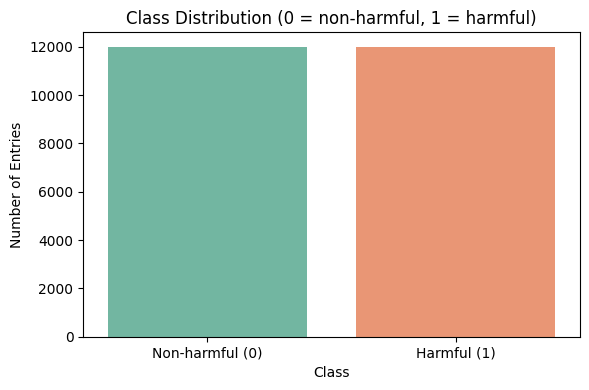

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title("Class Distribution (0 = non-harmful, 1 = harmful)")
plt.xlabel("Class")
plt.ylabel("Number of Entries")
plt.xticks(ticks=[0, 1], labels=["Non-harmful (0)", "Harmful (1)"])
plt.tight_layout()
plt.savefig("output/class_distribution.png")
plt.show()

In [ ]:
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return " ".join([word for word in words if word not in stop_words and len(word) > 2])

In [ ]:
def generate_wordcloud(texts, title, filename):
    cleaned_texts = [preprocess_text(t) for t in texts if isinstance(t, str)]
    all_text = " ".join(cleaned_texts)
    wc = WordCloud(width=1000, height=500, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(f"output/{filename}.png")
    plt.show()

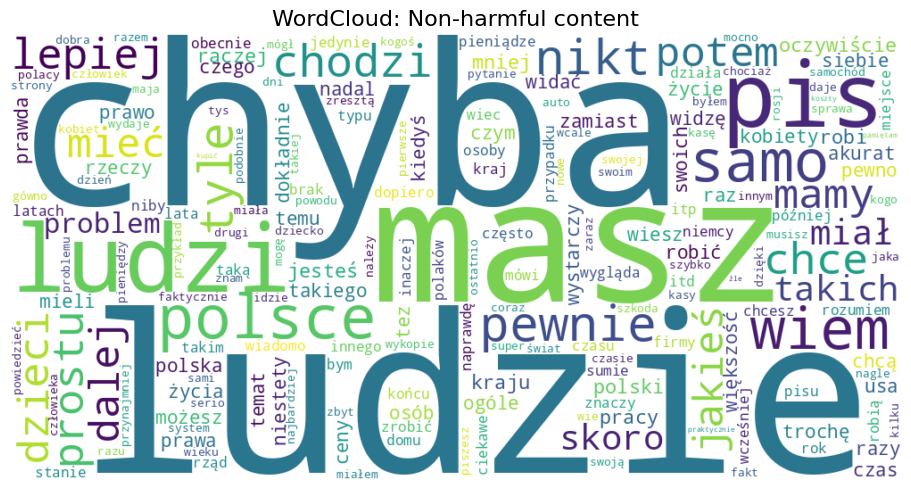

In [ ]:
generate_wordcloud(df[df["Class"] == 0]["Text"], "WordCloud: Non-harmful content", "wordcloud_nonharmful")


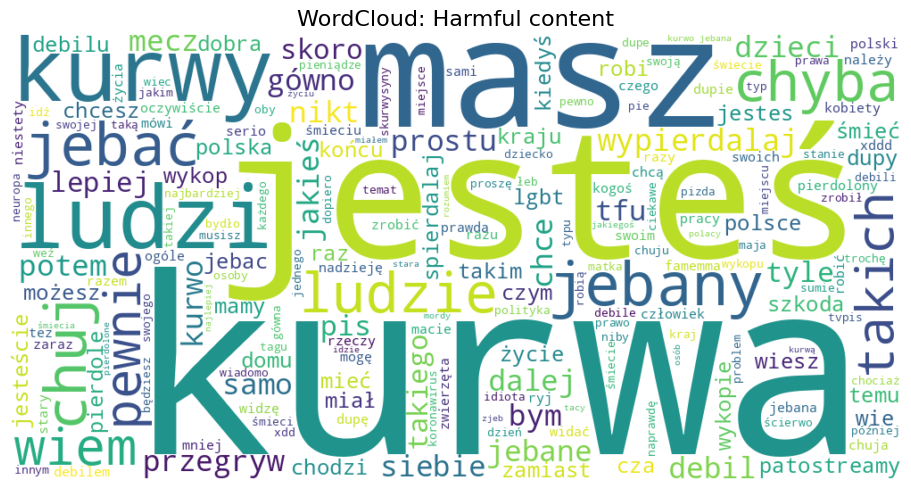

In [70]:
generate_wordcloud(df[df["Class"] == 1]["Text"], "WordCloud: Harmful content", "wordcloud_harmful")